In [2]:

import numpy as np  
import pymc as pm  
from matplotlib import pyplot as plt  
  
# Defining the dice and preparing data  
tampered_dice = [1 / 12, 1 / 12, 1 / 12, 1 / 12, 1 / 12, 7 / 12]  
good_dice = [1 / 6] * 6  
num_rolls = 10000  
x = list(range(0, num_rolls, 1))  

In [25]:
for idx, dice in enumerate([tampered_dice, good_dice]):
    p = np.array(dice) 
    dice_rolls = np.random.choice(6, size=num_rolls, p=p)  
    print (idx, dice)
    print(p)
    print(dice_rolls)

0 [0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.5833333333333334]
[0.08333333 0.08333333 0.08333333 0.08333333 0.08333333 0.58333333]
[3 2 0 ... 5 3 5]
1 [0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
[0 5 2 ... 1 1 5]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 13 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [face, p]
Sampling: [face]


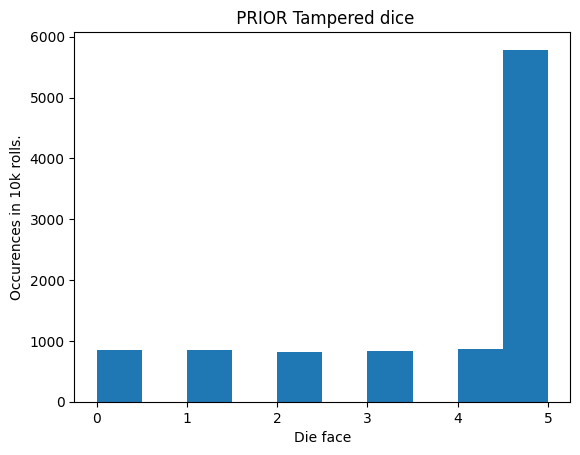

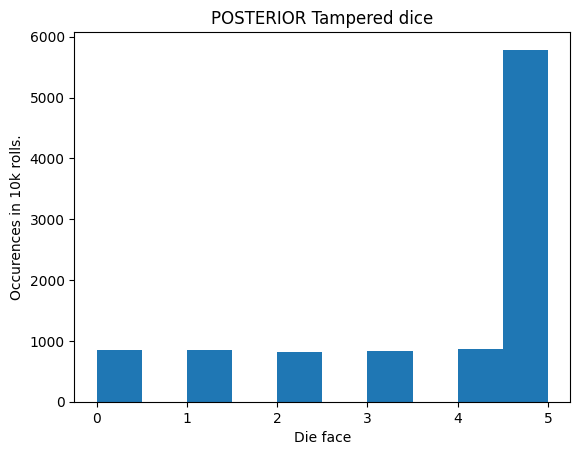

Dice may have been tampered with.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 12 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [face, p]
Sampling: [face]


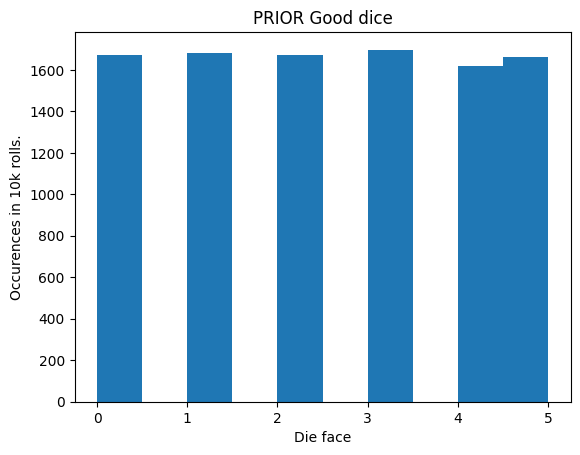

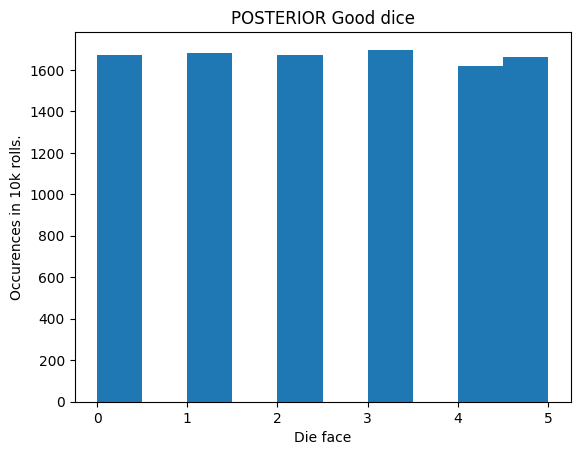

Dice does not seem to have been tampered with.


In [30]:
for idx, dice in enumerate([tampered_dice, good_dice]):  
    # generate the dice rolls data  
    p = np.array(dice)  
    dice_rolls = np.random.choice(6, size=num_rolls, p=p)  
  
    # specify the dice model  
    with pm.Model() as dice_model:  
        p = pm.Dirichlet("p", a=np.ones(6))  # prior
  
        # specify the likelihood  
        face = pm.Categorical("face", p=p, observed=dice_rolls)  
  
        # perform inference using the data  
        trace = pm.sample(draws=1000, tune=100, chains=2)  # posterior samples
  
        # sampling data from before and after data is available  
        prior_predictive = pm.sample_prior_predictive()  
        post_pred = pm.sample_posterior_predictive(trace)  
  
    # prior_predictive.observed_data.face is based solely on your initial beliefs (the priors), while trace.observed_data.face is based on your updated beliefs after taking into account the observed data (the posteriors)

    # presenting prior predictions  
    fig, ax = plt.subplots()  
    ax.hist(prior_predictive.observed_data.face)  
    plt.xlabel("Die face")  
    plt.ylabel("Occurences in 10k rolls.")  
    if idx == 0:  
        plt.title(" PRIOR Tampered dice")  
    else:  
        plt.title("PRIOR Good dice")  
    plt.savefig(f"prior_predictive_{idx}.png", dpi=100)  
    plt.show()  
  
    # presenting posterior predictions  
    trace.extend(post_pred)  
  
    fig, ax = plt.subplots()  
    ax.hist(trace.observed_data.face)  
    plt.xlabel("Die face")  
    plt.ylabel("Occurences in 10k rolls.")  
    if idx == 0:  
        plt.title("POSTERIOR Tampered dice")  
    else:  
        plt.title("POSTERIOR Good dice")  
    plt.savefig(f"posterior_predictive_{idx}.png", dpi=100)  
    plt.show()  
  
    # calculate the expected probabilities of a fair dice  
    expected_probs = np.ones(6) / 6  
  
    # calculate the difference between the posterior probabilities and the expected probabilities  
    prob_diff = np.abs(trace.posterior.p - expected_probs)  
  
    # calculate the mean and standard deviation of the difference  
    mean_diff = np.mean(prob_diff, axis=0)  
    std_diff = np.std(prob_diff, axis=0)  
  
    # set a threshold for the difference  
    threshold = 0.05  
  
    # check if the difference between the inferred probabilities and the expected probabilities is above the threshold  
    tampered = mean_diff > threshold  
  
    if tampered.any():  
        print("Dice may have been tampered with.")  
    else:  
        print("Dice does not seem to have been tampered with.")

In [26]:
np.ones(6)

array([1., 1., 1., 1., 1., 1.])